## Details of the data set is mentione below.

India is 2nd world's largest population country and every year lacks student get their college degree from various institutes in India I scrap a website containing the top 200 colleges in India in 2022, a dataset containing a list of colleges from rank 1 to 200 and some other features,
the feature is explained below:-
1)rank:- 1-200 ranking of the college according to different parameters🔥🔥

2)name:- the name of the respective college

3)ownership:- which organization own the college there are two values either public or private

4)grade:- the grade of college higher count of 'A' the good score will max(5)

5)TLR(Teaching-learning resources)= define resources as materials used by a teacher to supplement classroom instruction or to stimulate the interest of learners in simple quality content delivered to students.

6)RPC(Research and Professional Practice) developing knowledge and experience, which are standard within a field or profession, and involves information-gathering procedures that are a part of the typical relationship between practitioners

7)GO(graduation Outcome)= to understand whether recent graduates are in employment, have continued with further study or are doing something else

8)OI(outreach and inclusivity)=> it contains the following factors the number of students from another state or countries, per cent of women, facility for physically challenged student

9)perc(peer perception):- college perception in the market, stakeholder, facility perception, student perception, perception of other universities for you.

10)total:- overall percentage

if you have any difficulty in any of the features please visit the link NIRF](https://www.nirfindia.org/parameter)

The data set was taken from college where someone downloaded the data set from official website run by National institutional
Ranking Framework. The data set contains top 200 engineering colleges of India
and ranks based on the research, graduation outcome, outreach inclusivity,teaching resource
material, perception of the peer group about colleges etc.

We have taken an effort to visualise the data and completed the descriptive 
as well as inferential analysis using hypothesis testing. In the hypothesis testing
annova, shapiro, kruskal etc tests were applied in the project and their results are 
stated.  The interest has been put to find how the ranking of private or public colleges vary
. The steps were taken to categorise the college name into three category like IIT, NIT
and others. Further the data was analysed based on this.

### Importing relevant libraries

In [417]:
import pandas as pd
import numpy as np

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [419]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [437]:
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scikit_posthocs

## Cleaning data 

In [122]:
data  = pd.read_csv('archive/200_top_Engineering_Colleges_india.csv') # reading the csv file
data.drop(columns=['Unnamed: 0'],axis =1 ,inplace=True)
data.head()

,rank,name,owner_ship,grade,TLR,RPC,go,oi,perc,total
0,1,IIT Madras - Indian Institute of Technology,Public/Government,AAAAA,94.62,97.66,80.42,62.85,100.0,90.04
1,2,IIT Delhi - Indian Institute of Technology,Public/Government,AAAAA,86.95,96.00,83.43,68.56,96.92,88.12
2,3,IIT Bombay - Indian Institute of Technology,Public/Government,AAAAA,87.53,90.82,79.18,57.36,88.7,83.96
3,4,IIT Kanpur - Indian Institute of Technology,Public/Government,AAAAA,87.95,79.98,89.71,59.47,83.01,82.56
4,5,IIT Kharagpur - Indian Institute of Technology,Public/Government,AAAAA,79.21,84.61,80.91,53.09,82.63,78.89


In [123]:
data.shape

(200, 10)

In [476]:
data.dtypes

rank            int64
name           object
owner_ship     object
grade          object
TLR           float64
RPC           float64
go            float64
oi            float64
perc          float64
total         float64
dtype: object

In [477]:
for col in data.select_dtypes(include=object).columns: # removing trailing spaces from the data
    data[col] = data[col].apply(lambda x: str.strip(x))

In [478]:
def cleanSpaceEmptyString(element): # function to replace empty string with null values so panda can recognize it
        if element == '' or element==' ' or element=='none' :
            return np.nan
        else:
            return element

In [479]:
data['perc']=data['perc'].apply(cleanSpaceEmptyString) # applying function to remove the empty string and replace with null values
data['total']= data['total'].apply(cleanSpaceEmptyString)
data['grade'] = data['grade'].apply(cleanSpaceEmptyString)
data['perc']=data['perc'].astype('float') # change the data type from string to float
data['total']= data['total'].astype("float")


In [480]:
data['perc']=data['perc'].fillna(method='ffill') # replacing null values with forward filling
data['total']=data['total'].fillna(method='ffill')
data['grade'] = data['grade'].fillna(method ='ffill')
# here the data is in sorted order on the bases of ranking of college, so forward or backward value filling approach
# is better to replace null values

## Descriptive Analysis and Visualization

In [481]:
data.describe() # five point summary of numerical data

,rank,TLR,RPC,go,oi,perc,total
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,58.842950,26.693600,58.411600,54.071450,16.124700,44.564200
std,57.879185,13.622641,20.207501,10.960065,7.797928,18.165438,11.271182
min,1.000000,1.470000,1.500000,30.120000,34.990000,0.540000,33.700000
25%,50.750000,53.415000,11.467500,50.820000,49.207500,4.140000,36.770000
50%,100.500000,58.990000,19.405000,57.645000,53.410000,10.320000,40.110000
75%,150.250000,65.527500,37.002500,64.887500,59.015000,22.010000,49.712500
max,200.000000,94.620000,97.660000,90.120000,79.480000,100.000000,90.040000


From above the mean of go and oi are similar with median , which means the data might appear normally distributed
for graduation outcome (go) and outreach and inclusivity (oi)

Rest features have significant difference in mean and median, it means data might not be normally distributed for these
feature

In [483]:
data.select_dtypes(include='object').describe()

,name,owner_ship,grade
count,200,200,200
unique,200,2,4
top,IIT Madras - Indian Institute of Technology,Private,AAAA
freq,1,110,135


It shows that college names are not repeating here in the data

Most of the colleges are from private category

Grade four timesA (AAAA) is the most frequet grade obtained by the colleges in NRIF ranking

In [148]:
data['grade'].value_counts() # from above it is clear that most of the college lies with AAAAA 

AAAA     135
AAAAA     34
AAA       30
AA         1
Name: grade, dtype: int64

There is only one college in the whole data with lowest grade AA

In [485]:
data[data['grade']=='AA'] # details of the college with lowest grade

,rank,name,owner_ship,grade,TLR,RPC,go,oi,perc,total
128,129,JNTUK Kakinada - Jawaharlal Nehru Technologica...,Public/Government,AA,57.01,19.32,47.56,50.19,3.65,37.79


In [486]:
# details of top 10 colleges
data.sort_values(by='rank').head(10)

,rank,name,owner_ship,grade,TLR,RPC,go,oi,perc,total
0,1,IIT Madras - Indian Institute of Technology,Public/Government,AAAAA,94.62,97.66,80.42,62.85,100.00,90.04
1,2,IIT Delhi - Indian Institute of Technology,Public/Government,AAAAA,86.95,96.00,83.43,68.56,96.92,88.12
2,3,IIT Bombay - Indian Institute of Technology,Public/Government,AAAAA,87.53,90.82,79.18,57.36,88.70,83.96
3,4,IIT Kanpur - Indian Institute of Technology,Public/Government,AAAAA,87.95,79.98,89.71,59.47,83.01,82.56
4,5,IIT Kharagpur - Indian Institute of Technology,Public/Government,AAAAA,79.21,84.61,80.91,53.09,82.63,78.89
5,6,IIT Roorkee - Indian Institute of Technology,Public/Government,AAAAA,75.98,78.10,90.12,63.09,61.36,76.70
6,7,IIT Guwahati - Indian Institute of Technology,Public/Government,AAAAA,75.89,72.89,84.64,56.90,57.15,72.98
7,8,NIT Trichy - National Institute of Technology ...,Public/Government,AAAAA,76.39,58.43,79.16,64.49,64.38,69.17
8,9,IIT Hyderabad - Indian Institute of Technology,Public/Government,AAAAA,80.32,59.89,72.39,54.85,59.96,68.03
9,10,NIT Surathkal - National Institute of Technolo...,Public/Government,AAAAA,72.87,56.42,77.69,63.89,53.24,66.04


Above table shows that top 10 colleges are either from IIT or from NIT , generally IIT are most in number

IIT Madras is at the top and all top 10 colleges are obtaining the topmost grade (AAAAA)

All top most colleges contain public or government type ownership, in other words no private college comes in the
top 10 category of colleges in NIRF ranking

In [495]:
# finding how many IIT and NIT and other colleges come in top 100 category
def Categorization(series): # function to make three category of columns that is ITT, NIT and other
    if 'IIT' in series or 'indian institute of technology' in str.lower(series):
        return 'IIT'
    elif 'NIT' in series or 'national institute of technology' in str.lower(series):
        return 'NIT'
    else:
        return 'other'
    
nameCategory = data['name'].apply(Categorization).value_counts()/len(data)*100

fig = px.pie(nameCategory, values=nameCategory.values, names=nameCategory.index, title='College Category',
            color_discrete_sequence=['#32a852', '#3261a8', '#a83259'], hole=0.45)
fig.show()


IIT and NIT are contributing only 29% of data which contains 200 colleges but mostly top rankings are hold by these 
colleges

In [498]:
ownershipPie = data['owner_ship'].value_counts()

fig = px.pie(ownershipPie, values=ownershipPie.values, names=ownershipPie.index, title='Ownership Type',
            color_discrete_sequence=['#32a852', '#3261a8', '#a83259'], hole=0.4)
fig.show()

Above donut chart shows that in top 200 colleges of india major contribution is shared by the public or government's colleges

In [500]:
barGrade =data['grade'].value_counts()
dictionary = {'grade':barGrade.index, 'gradeCount':barGrade.values}
barGrade = pd.DataFrame(dictionary)

fig = px.bar(barGrade, x='grade', y='gradeCount', 
             color_discrete_sequence=['#32a852', '#3261a8', '#a83259','#D0D57C'],
            title='Grades Count')
fig.show()

Above bar-chart shows that grade AAAA is obtained by the most of the colleges while only 1 college is there with grade AA

There is no colleges that lies in top 200 colleges containing grade A

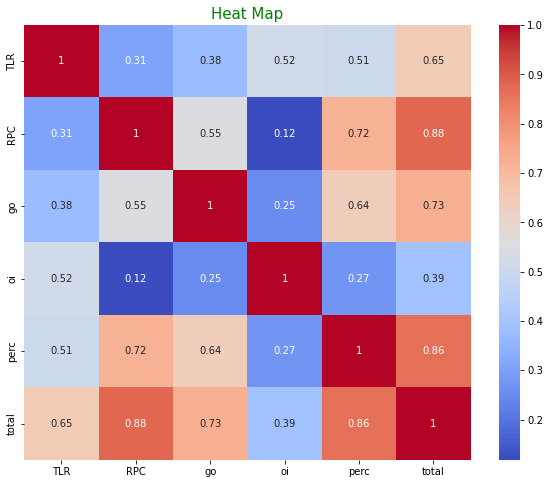

In [505]:
plt.figure(figsize =(10,8))
plt.title('Heat Map', fontdict={'size':15,'color':'green'})
sns.heatmap(data.iloc[:, 4:].corr(),annot=True, cmap='coolwarm')
plt.show()

Pair Plot


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

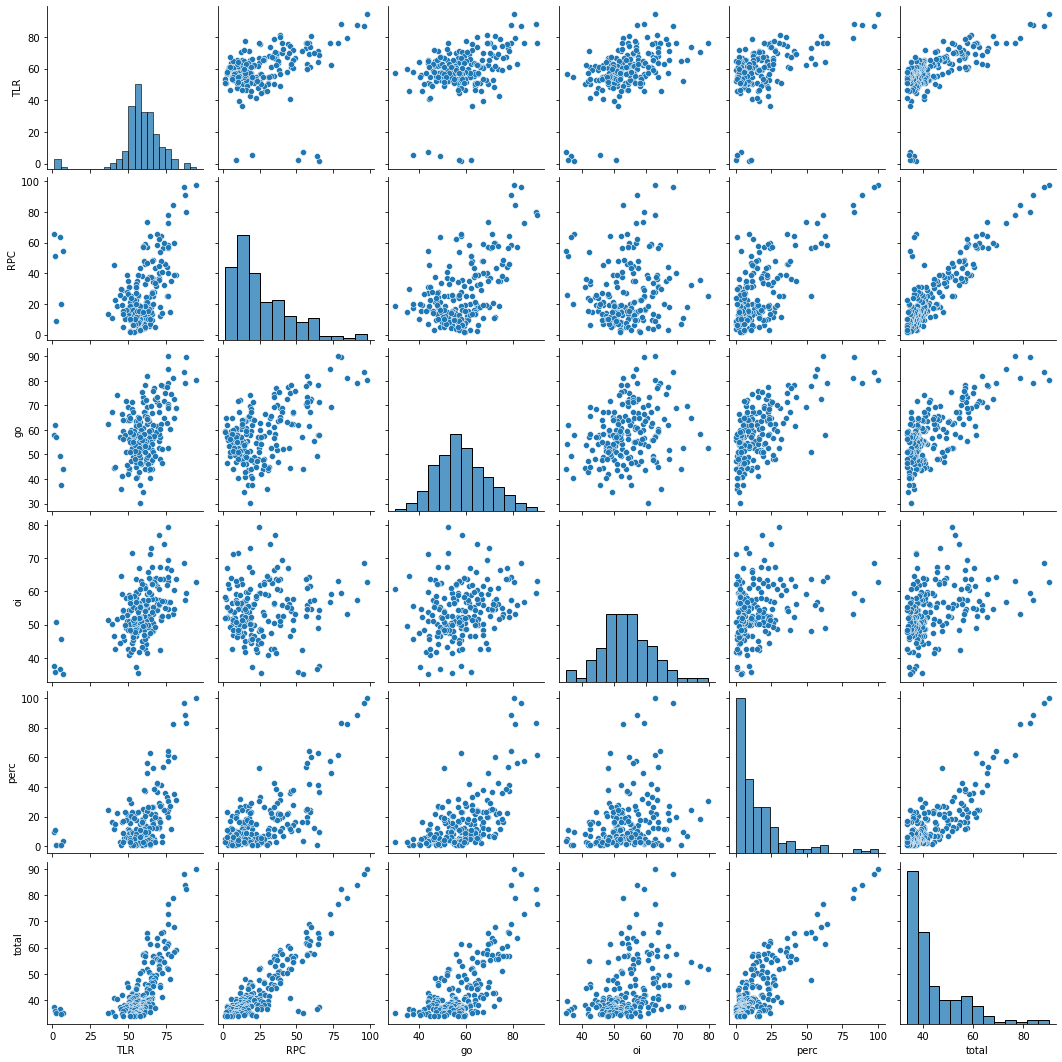

In [515]:
print("Pair Plot")
plt.figure(figsize =(12,8))
sns.pairplot(data.iloc[:, 4:])
plt.show

In [517]:
fig =px.scatter(data,x='total',y='RPC',color='owner_ship', hover_data=['name'],title='Total vs RVC')
fig.show()

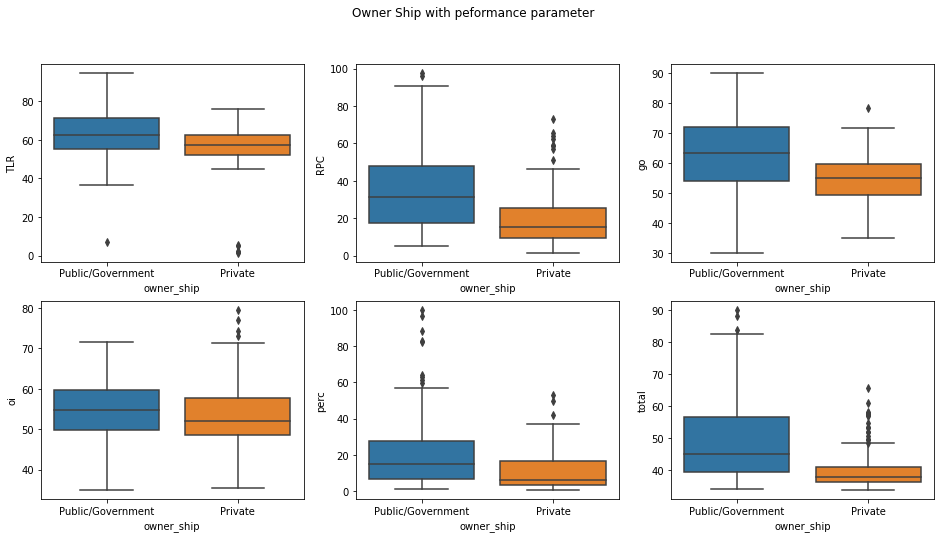

In [527]:
fig, axes = plt.subplots(2, 3, sharex=False, figsize=(16,8))
fig.suptitle('Owner Ship with peformance parameter')
sns.boxplot(ax=axes[0,0],x=data['owner_ship'],y=data['TLR'])

sns.boxplot(ax=axes[0,1],x=data['owner_ship'],y=data['RPC'])

sns.boxplot(ax=axes[0,2],x=data['owner_ship'],y=data['go'])

sns.boxplot(ax=axes[1,0],x=data['owner_ship'],y=data['oi'])

sns.boxplot(ax=axes[1,1],x=data['owner_ship'],y=data['perc'])
sns.boxplot(ax=axes[1,2],x=data['owner_ship'],y=data['total'])
plt.show()

From above graph it is clear that public colleges are dominating in all performance parameter whether it outreach inclusivity
, Research area, graduation outcome etc.

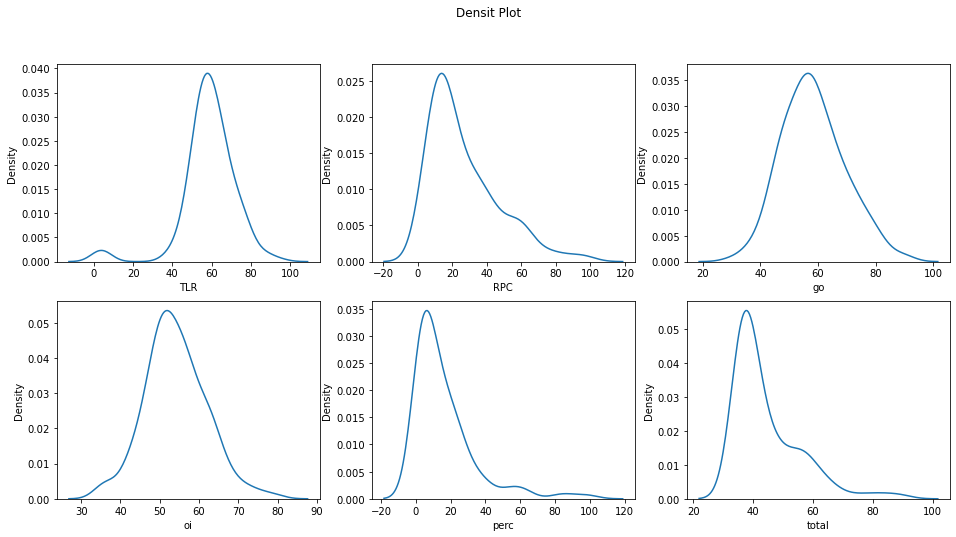

In [529]:
fig, axes = plt.subplots(2, 3, sharex=False, figsize=(16,8))
fig.suptitle('Densit Plot')
sns.kdeplot(ax=axes[0,0],x=data['TLR'])
sns.kdeplot(ax=axes[0,1],x=data['RPC'])

sns.kdeplot(ax=axes[0,2],x=data['go'])

sns.kdeplot(ax=axes[1,0],x=data['oi'])

sns.kdeplot(ax=axes[1,1],x=data['perc'])
sns.kdeplot(ax=axes[1,2],x=data['total'])
plt.show()

From above graph it can be observed that go and oi appears to follow normal distribution however rest of the plots seems to be either right or left skewed

# Inferences with hypothesis

Applying normality test Shapiro and Jarque bera on numerical columns to test the normality of variables

Hypothesis of normality test

Null hypothesis Ho: means are same or feature is normally distributed

Alternative hypothesis H1: featue is not normally distributed

In [532]:
for col in data.iloc[:,4:].columns: # shapirot normality test
    print(col,'-',  stats.shapiro(data[col]))
    # oi and go normally distributed others are not

TLR - ShapiroResult(statistic=0.8522736430168152, pvalue=5.55234623469264e-13)
RPC - ShapiroResult(statistic=0.8833180665969849, pvalue=2.460988531016728e-11)
go - ShapiroResult(statistic=0.989660918712616, pvalue=0.1593538373708725)
oi - ShapiroResult(statistic=0.9883754253387451, pvalue=0.1026219055056572)
perc - ShapiroResult(statistic=0.744276762008667, pvalue=2.6774380590463413e-17)
total - ShapiroResult(statistic=0.8081384301185608, pvalue=5.929714710109458e-15)


Using p value test and level of signifigance of 0.05, we conclude go and oi posses values greater than 0.05,so we reject
null hypothesis in case of go and oi and conclude these two variables follows normal distribution

Outreach inclusivity and Graduation outcome are the two performance parameter here which follows normal distribution, rest are not normally distributed

In [535]:
for col in data.iloc[:,4:].columns:  # jarque bera normality test 
    print(col,'-', stats.jarque_bera(data[col]))
    # oi and go normally distributed others are not even by jarque bera test

TLR - Jarque_beraResult(statistic=399.640533557162, pvalue=0.0)
RPC - Jarque_beraResult(statistic=60.39168641445908, pvalue=7.693845560652335e-14)
go - Jarque_beraResult(statistic=4.120343728786111, pvalue=0.1274320669778619)
oi - Jarque_beraResult(statistic=4.920190036042058, pvalue=0.08542683349301283)
perc - Jarque_beraResult(statistic=468.2908105333136, pvalue=0.0)
total - Jarque_beraResult(statistic=156.9630075465645, pvalue=0.0)


Jarque bera test also provide same resutl as it was obtained in the shapiro test

### Going for the non parametric test for the  variable TLR, RPC, perc, total as these are not normally distributed

In [538]:
def prepareKruskal(numericSeriesName): # function for the preparation of kruskal  (non parametric test of annova)
    public= data[data['owner_ship']=='Public/Government'][numericSeriesName]
    private = data[data['owner_ship']=='Private'][numericSeriesName]
    return (public,private)

In [539]:
listKruskalVariable = ['total','RPC','perc','TLR']
for col in listKruskalVariable:
    print(stats.kruskal(prepareKruskal(col)[0],prepareKruskal(col)[1]))

KruskalResult(statistic=34.51894150480505, pvalue=4.221235024432624e-09)
KruskalResult(statistic=31.99845673246184, pvalue=1.5429510758075902e-08)
KruskalResult(statistic=16.169294327688096, pvalue=5.792550377084221e-05)
KruskalResult(statistic=13.397217442928824, pvalue=0.00025199785222237227)


We Fails to reject null hypothesis here, it means that the private and public ownership effects total, RPC, perc and TLR

### Annova test for the graduation outcome and Outreach & inclusivity

In [540]:
# go and oi are normal
# now going for levene test to make sure that the data is coming from same population
for col in ['go','oi']:
    print(col,'-',stats.levene(prepareKruskal(col)[0],prepareKruskal(col)[1]))
# population variation same for io but different for go
# we will go for non parametric test for the go() and parametric test for the oi (f-one way)

go - LeveneResult(statistic=21.327749034245823, pvalue=6.9578834951644725e-06)
oi - LeveneResult(statistic=0.014034030355529864, pvalue=0.9058190749375966)


p value for go is less than signifigance level and greater in case of oi , we conclude go has no equal variance while population
of oi has equal variance. Further we would like to apply parametric test annova for oi and kruskal for go 

In [546]:
### Kruskal test for the go
print('go', stats.kruskal(prepareKruskal('go')[0],prepareKruskal('go')[1]))
print(pd.pivot_table(data,index='owner_ship',values='go'))
# go impacts

go KruskalResult(statistic=23.59414245280757, pvalue=1.1894905765095415e-06)
                          go
owner_ship                  
Private            54.858000
Public/Government  62.754889


p value is less that 0.05, rejecting null hypothesis , it make sure that with more than 99% confidence we can say that gradution outcome is impacted from ownership of the college

Public colleges offer better graduation outcome than private colleges

In [550]:
### oi one way-annova test
stats.f_oneway(prepareKruskal('oi')[0],prepareKruskal('oi')[1])
# impacts

F_onewayResult(statistic=0.29555810904211105, pvalue=0.5872921691747065)

p value is very high for the above hypothesis, here we fail to reject null hypothesis, it means outreach and inclusivity
is not effected on the basis of ownership of college

In [553]:
print('f critical',stats.f.isf(0.05,1,199))

f critical 3.8886126124173037


### Factors impacting total rating

In [555]:
pd.pivot_table(data, values='total',index='grade')

,total
grade,
AA,37.790000
AAA,36.640333
AAAA,41.828222
AAAAA,62.618529


In [562]:
# null hypothesis Ho: total rating does not impacted by grades
# alternate hypothesis h1: grades impacts total rating

In [563]:
def prepareKruskalGrade(numericSeriesName): # function for the preparation of kruskal 
    AA= data[data['grade']=='AA'][numericSeriesName]
    AAA = data[data['grade']=='AAA'][numericSeriesName]
    AAAA = data[data['grade']=='AAAA'][numericSeriesName]
    AAAAA = data[data['grade']=='AAAAA'][numericSeriesName]
    return (AA,AAA,AAAA,AAAAA)

In [564]:
stats.kruskal(prepareKruskalGrade('total')[0],
              prepareKruskalGrade('total')[1],
              prepareKruskalGrade('total')[2],
              prepareKruskalGrade('total')[3]
             )

KruskalResult(statistic=88.77195392629162, pvalue=4.020732928287061e-19)

The p value is almost zerot, it means we convicts more than 99% confidence that grades impacts total rating

Higher grades effects the rating positively

In [565]:
# category vs total

# null hypothesis Ho: total rating does not impacted by category
# alternate hypothesis h1: category impacts total rating
data1 = data[['total','name']].copy()
data1['category'] = data['name'].apply(Categorization)
data1.tail()

,total,name,category
195,33.90,"KLE Technological University, Hubballi",other
196,33.88,DJSCE Mumbai - Dwarkadas J Sanghvi College of ...,other
197,33.77,SVCET Chittoor - Sri Venkateswara College of E...,other
198,33.76,BMSIT Bangalore - BMS Institute of Technology ...,other
199,33.70,VJIT Hyderabad - Vidya Jyothi Institute of Tec...,other


In [566]:
def prepareKruskalCategory(numericSeriesName): # function for the preparation of kruskal 
    iit= data1[data1['category']=='IIT'][numericSeriesName]
    nit = data1[data1['category']=='NIT'][numericSeriesName]
    other = data1[data1['category']=='other'][numericSeriesName]
    return (iit,nit,other)

In [567]:
stats.kruskal(prepareKruskalCategory('total')[0],
              prepareKruskalCategory('total')[1],
              prepareKruskalCategory('total')[2]
             ) # impacts

KruskalResult(statistic=41.365253318780006, pvalue=1.0414762497355796e-09)

In [568]:
pd.pivot_table(data1,values ='total',index='category')

,total
category,
IIT,57.629667
NIT,47.882143
other,41.149648


p vaue of the test is almost zero, so rejecting null hypothesis , with more than 99% confidence level we observed that
category impacts total rating. 

IIT college's rating is higher while NIT and other lie below respectively

# Conclusion

The data contains 45% private engineering colleges and 55% government colleges

Out of these 15% are the IIT engineering colleges and 14% NIT that contribute to 
the 200 top engineering college of India

Most of the colleges tat are coming at the top contains grade AAAA, there is no A grade
college that lies in the top 200 engineering colleges

With the correlation matrix , it is observed that most the rating are correlated
with each other. For example peer perception about college is positively correlated the 
research practices of the college. Similarly, outreach inclusivity (oi) is linked with
Teaching learning Resource  (TLR)

With the box plot , it is observed that government colleges are most likely to perform better
in all performance criteria like TLR, oi, RPC, perc, go etc.

Shapiro test confirms that the for oi and go was normally distributed while rest of the
numerical features did not follow normal distribution.

Using hypothesis tests we make some relevant remarks like 
1. graduation outcome are better in government college compare to private college
2. Outreach inclusivity is not affected by the ownership of colleges
3. Grading impacts the total rating , higher grading leads to good total rating of the college
4. Ownership of the college impacts the total rating.  
Government colleges likely to provide good research practices, learning and teaching
and good perception about the college in peer groups. 

# Thank you!